In [237]:
%pip install tensorflow
from tensorflow.keras.datasets import cifar10

^C
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name 'pywrap_tensorflow' from 'tensorflow.python' (c:\Users\ghimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\__init__.py)

In [234]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

NameError: name 'cifar10' is not defined

In [219]:
file_paths = [
    r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\data_batch_1",
    r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\data_batch_2",
    r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\data_batch_3",
    r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\data_batch_4",
    r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\data_batch_5"
]

data_list = []
labels_list = []

for file_path in file_paths:
    # Load the data
    data_dict = unpickle(file_path)
    
    # Extract 'data' and 'labels'
    data_array = np.array(data_dict[b'data'])
    labels = np.array(data_dict[b'labels'])
    
    # Append to lists
    data_list.append(data_array)
    labels_list.append(labels)

# Concatenate all arrays
X_train = np.concatenate(data_list, axis=0)
y_train = np.concatenate(labels_list, axis=0)

X_train.shape, y_train.shape


((50000, 3072), (50000,))

In [218]:
data = unpickle(r"C:\Users\ghimi\OneDrive\Documents\lab\Data_Mining\Lab-5_ANN\cifar-10-batches-py\test_batch")
X_test = np.array(data[b'data'])
y_test = np.array(data[b'labels'])

X_test.shape, y_test.shape

((10000, 3072), (10000,))

In [129]:
# 1. Load dataset
# train = pd.read_csv(".\\CIFAR-10\\train.csv")

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # 0 - airplane, 9 - truck

In [222]:
X_train.shape

(3072, 50000)

In [223]:
X_test = X_test.T
X_test_scaled = X_test/255

X_test.shape, y_test.shape 

((10000, 3072), (10000,))

In [231]:
X_train = X_train.T
X_train = X_train / 255

X_train.shape, y_train.shape 

((50000, 3072), (50000,))

(32, 32, 3)


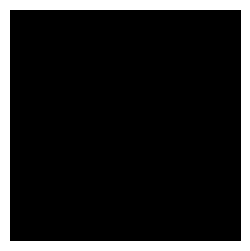

In [233]:
index = np.random.randint(0, len(X_train))

new_img =  X_train[index]  
new_img = new_img.reshape(32,32,3)
print(new_img.shape) 
# plt.figimage(new_img)
plt.figure(figsize=(3,3))
plt.imshow(new_img) 
plt.axis("off")
plt.show()

In [62]:
def kaiming_normal(w_shape):
    n_input = w_shape[1]
    var = 2.0 / n_input
    sd = np.sqrt(var)
    return np.random.normal(0, sd, size = w_shape)

In [63]:
def initial_params():    
    W1 = kaiming_normal((512,784))
    W2 = kaiming_normal((128,512))
    W3 = kaiming_normal((10,128))
    b1 = np.random.normal(0, 1, size=(512,1))
    b2 = np.random.normal(0, 1, size=(128,1))
    b3 = np.random.normal(0, 1, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2, W3, b3

_, _, W2, _, _, _  = initial_params()
W2[:100]

array([[ 0.00925707, -0.01182521,  0.07950398, ..., -0.05712916,
        -0.01004061,  0.04295494],
       [ 0.04632933,  0.01984781, -0.04155681, ..., -0.03196539,
        -0.10402469, -0.02583548],
       [ 0.18370535,  0.00292043, -0.01027423, ..., -0.14686686,
         0.0060496 ,  0.01183088],
       ...,
       [ 0.0078487 , -0.07369176, -0.05471001, ...,  0.02713474,
        -0.03569581, -0.08357005],
       [-0.03154196, -0.06350561,  0.07310521, ..., -0.03435042,
         0.07001726,  0.07736996],
       [-0.04864935,  0.04516457, -0.04718643, ...,  0.02457078,
        -0.01893666, -0.00115035]])

In [64]:
def LeakyReLU_fn(vector, alpha=0.01):
    return np.where(vector > 0, vector, alpha * vector)

# Example usage
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
leaky_relu = LeakyReLU_fn(vector)

vector, leaky_relu

(array([[ 0.37700599],
        [-0.30988893],
        [-0.26211368],
        [-0.24089361],
        [-0.39546297],
        [-0.33914058],
        [ 0.06237394],
        [-0.49283226],
        [-0.27406423],
        [-0.35030625]]),
 array([[ 0.37700599],
        [-0.00309889],
        [-0.00262114],
        [-0.00240894],
        [-0.00395463],
        [-0.00339141],
        [ 0.06237394],
        [-0.00492832],
        [-0.00274064],
        [-0.00350306]]))

In [65]:
def d_LeakyReLU(vector, alpha=0.01):
    return np.where(vector > 0, 1.0, alpha)


vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
d_leaky_relu = d_LeakyReLU(vector)

vector, d_leaky_relu

(array([[ 0.28693239],
        [ 0.46891183],
        [-0.21177232],
        [ 0.12514177],
        [-0.15401148],
        [-0.42789229],
        [-0.08614569],
        [ 0.29872256],
        [ 0.03216592],
        [-0.10938453]]),
 array([[1.  ],
        [1.  ],
        [0.01],
        [1.  ],
        [0.01],
        [0.01],
        [0.01],
        [1.  ],
        [1.  ],
        [0.01]]))

In [66]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([-0.03874859, -0.17651747, -0.2898168 , -0.34894475, -0.34542793,
        0.17277914, -0.20804188,  0.00126703, -0.12143501, -0.46650158,
        0.        ])

(-0.5, 0.5)

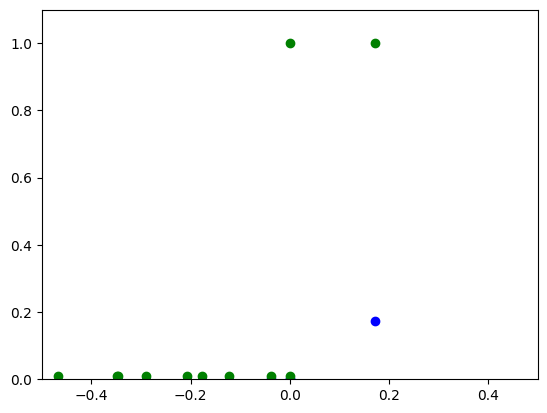

In [67]:
leaky_relu = LeakyReLU_fn(vector)
d_leaky_relu = d_LeakyReLU(vector)

plt.scatter(vector, leaky_relu, c='blue')
plt.scatter(vector, d_leaky_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [68]:
def sigmoid(vector):
    return 1 / (1 + np.exp(-vector))

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
sigm = sigmoid(vector)
vector, sigm

(array([[-0.31114558],
        [-0.16470195],
        [-0.34057315],
        [ 0.29391439],
        [-0.19998352],
        [-0.49191382],
        [-0.15538583],
        [-0.00747857],
        [-0.36229555],
        [ 0.31520704]]),
 array([[0.42283514],
        [0.45891734],
        [0.41567026],
        [0.57295417],
        [0.45017008],
        [0.37944282],
        [0.46123152],
        [0.49813037],
        [0.41040399],
        [0.57815573]]))

In [69]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

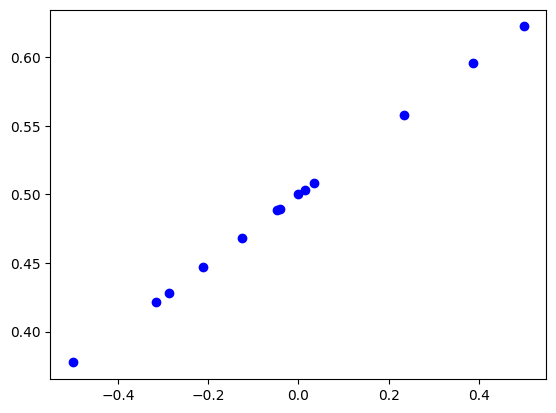

In [70]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

sigm = sigmoid(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, sigm, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [71]:
def forward_prop(W1, b1, W2, b2, W3, b3, A0):
    Z1 = np.dot(W1, A0) + b1
    A1 = LeakyReLU_fn(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = LeakyReLU_fn(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    return Z1, A1, Z2, A2, Z3, A3

In [72]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [73]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, A3, Z3, W3, A0, y_train, lambda_reg):
    m = A0.shape[1]
    dZ3 = A3 - y_train
    dZ2 = np.dot(W3.T, dZ3) * d_LeakyReLU(Z2)
    dZ1 = np.dot(W2.T, dZ2) * d_LeakyReLU(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T) + (lambda_reg / m) * W1
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambda_reg / m) * W2
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambda_reg / m) * W3
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

In [74]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3       

    return W1, b1, W2, b2, W3, b3

In [75]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [76]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [78]:
y_train.shape

(10, 41000)

In [79]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations, lambda_reg):
    W1, b1, W2, b2, W3, b3 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, W1, W2, A3, Z3, W3, X_train, y_train, lambda_reg)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A3,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, W3, b3, accuracy_list

In [80]:
def make_prediction(X_test, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_test) 
    pred = obtain_predictions(A3)
    return pred    

In [81]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [82]:
W1, b1, W2, b2, W3, b3, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.001, num_iterations=5000, lambda_reg=0.02)

Iteration: 0 	 Accuracy: 0.09934
Iteration: 5 	 Accuracy: 0.09932
Iteration: 10 	 Accuracy: 0.09890
Iteration: 15 	 Accuracy: 0.10198
Iteration: 20 	 Accuracy: 0.10700
Iteration: 25 	 Accuracy: 0.11024
Iteration: 30 	 Accuracy: 0.11132


In [ ]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
def test_predictions(W1, b1, W2, b2, W3, b3, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2, W3, b3)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

In [ ]:
test_predictions(W1, b1, W2, b2, W3, b3, X_test, y_test)